# Lab 2 by Sandeep Suresh

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

# Reading in Data

In [2]:
df = pd.read_csv('../data/airfoil_self_noise.dat', sep="\s+")
df.columns = ["Frequency", "Attack-Angle", "Chord-Length", "Velocity", "Thickness", "Sound-Pressure"]
df.head()

,Frequency,Attack-Angle,Chord-Length,Velocity,Thickness,Sound-Pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


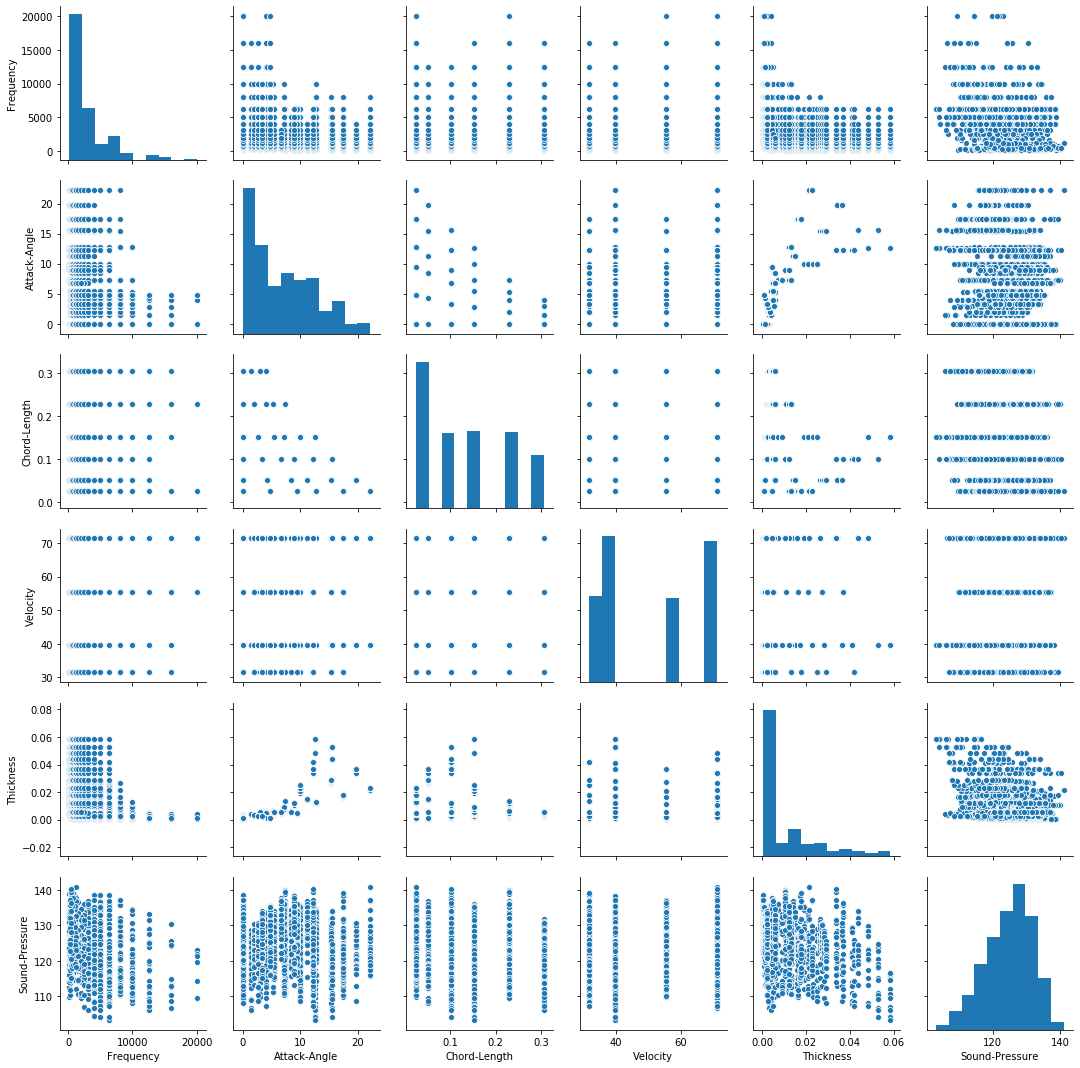

In [3]:
independent_variables = ["Frequency", "Attack-Angle", "Chord-Length", "Velocity", "Thickness"]
sb.pairplot(df);

## Finding Mean/Median/Range/First and Third Quartiles/Interquartile Range

In [4]:
df.mean()

Frequency         2887.769640
Attack-Angle         6.786818
Chord-Length         0.136436
Velocity            50.847137
Thickness            0.011146
Sound-Pressure     124.835034
dtype: float64

In [5]:
df.median()

Frequency         1600.000000
Attack-Angle         5.400000
Chord-Length         0.101600
Velocity            39.600000
Thickness            0.004957
Sound-Pressure     125.719000
dtype: float64

In [6]:
# Range
print("Range for Frequency: " + str(df['Frequency'].max()) + " - "+ str(df['Frequency'].min()))
print("Range for Attack-Angle: " + str(df['Attack-Angle'].max()) + " - "+ str(df['Attack-Angle'].min()))
print("Range for Chord-Length: " + str(df['Chord-Length'].max()) + " - "+ str(df['Chord-Length'].min()))
print("Range for Velocity: " + str(df['Velocity'].max()) + " - "+ str(df['Velocity'].min()))
print("Range for Thickness: " + str(df['Thickness'].max()) + " - "+ str(df['Thickness'].min()))
print("Range for Sound Pressure: " + str(df['Sound-Pressure'].max()) + " - "+ str(df['Sound-Pressure'].min()))

Range for Frequency: 20000 - 200
Range for Attack-Angle: 22.2 - 0.0
Range for Chord-Length: 0.3048 - 0.0254
Range for Velocity: 71.3 - 31.7
Range for Thickness: 0.058411300000000006 - 0.00040068199999999997
Range for Sound Pressure: 140.987 - 103.38


In [7]:
print(df['Frequency'].quantile([0.25, 0.75]))
print(df['Attack-Angle'].quantile([0.25, 0.75]))
print(df['Chord-Length'].quantile([0.25, 0.75]))
print(df['Velocity'].quantile([0.25, 0.75]))
print(df['Thickness'].quantile([0.25, 0.75]))
print(df['Sound-Pressure'].quantile([0.25, 0.75]))

0.25     800.0
0.75    4000.0
Name: Frequency, dtype: float64
0.25    2.0
0.75    9.9
Name: Attack-Angle, dtype: float64
0.25    0.0508
0.75    0.2286
Name: Chord-Length, dtype: float64
0.25    39.6
0.75    71.3
Name: Velocity, dtype: float64
0.25    0.002535
0.75    0.015840
Name: Thickness, dtype: float64
0.25    120.19000
0.75    129.99775
Name: Sound-Pressure, dtype: float64


## Creating a linear regression for each variable against sound pressure

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


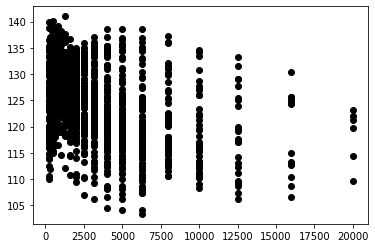

In [8]:
freqX = df['Frequency']
soundY = df['Sound-Pressure']
regFrequency = LinearRegression().fit([freqX], [soundY])
pred_y = regFrequency.predict([freqX])
plt.scatter(freqX, soundY, color='black')
print(regFrequency.coef_)

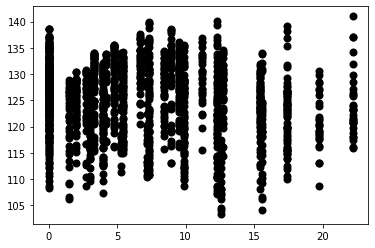

In [9]:
attackX = df['Attack-Angle']
soundY = df['Sound-Pressure']
regAttack = LinearRegression().fit([attackX], [soundY])
plt.scatter(attackX, soundY, color='black', linewidth=2)

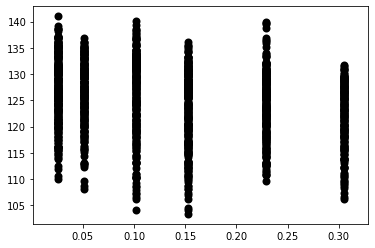

In [10]:
chordX = df['Chord-Length']
soundY = df['Sound-Pressure']
regFrequency = LinearRegression().fit([chordX], [soundY])
plt.scatter(chordX, soundY, color='black', linewidth=2)

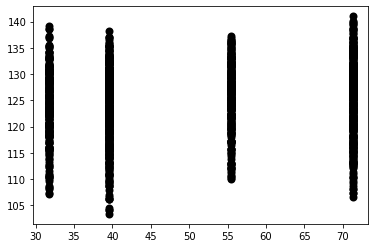

In [11]:
velX = df['Velocity']
soundY = df['Sound-Pressure']
regFrequency = LinearRegression().fit([velX], [soundY])
plt.scatter(velX, soundY, color='black', linewidth=2)

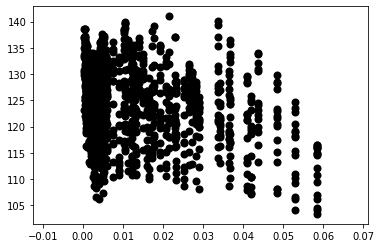

In [12]:
thickX = df['Thickness']
soundY = df['Sound-Pressure']
regFrequency = LinearRegression().fit([thickX], [soundY])
plt.scatter(thickX, soundY, color='black', linewidth=2)

Generally speaking, there seems to be a strong inverse relationship between Frequency and Sound-Pressure, and the same relationship for Thickness and sound pressure.

## Multiple Linear Regression Model

In [17]:
trainingDf = df.copy(deep=True)
trainingY = trainingDf.pop('Sound-Pressure').values
multiRegr = LinearRegression().fit(trainingDf,trainingY)

In [21]:
poly = PolynomialFeatures(2)
poly.fit_transform(trainingDf)

polyRegr = LinearRegression().fit(trainingDf, trainingY)

## KNN